In [2]:
import numpy as np
x = np.array([[1, 2, 3, 4], [2, 3, 4, 1], [3, 4, 1, 2], [4, 1, 2, 3]])
y = np.array([[4, 3, 2, 1], [3, 2, 1, 4], [2, 1, 4, 3], [1, 4, 3, 2]])
np.dot(x,y)

array([[20, 26, 28, 26],
       [26, 20, 26, 28],
       [28, 26, 20, 26],
       [26, 28, 26, 20]])

In [3]:
import math
eps = 1
x = 8
def fn2(x, eps):
    f = 1.0
    for k in range(1, eps):
        f += (-1)**k*x**(2*k)/math.factorial(2.*k)
    return f
while fn2(x, eps) - fn2(x, eps + 1) != 0:
        eps = eps + 1
print (eps)

10


Filename: andromeda_rot.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      53   (510, 340)   int16 (rescales to uint16)   


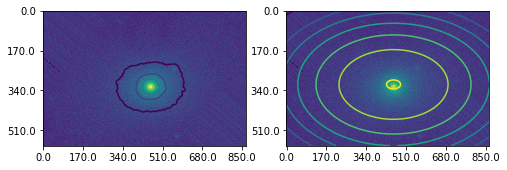

In [6]:
from astropy.io import fits
from scipy import ndimage, optimize
import matplotlib.pyplot as plt
from matplotlib import rcParams
data = fits.getdata('andromeda_rot.fits')
blurred_data = ndimage.gaussian_filter(data,sigma=3)
image = fits.info('andromeda_rot.fits')
image


def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

params = fitgaussian(data)
fit = gaussian(*params)

(height, x, y, width_x, width_y) = params

blurred_data = ndimage.gaussian_filter(data,sigma=3)
import matplotlib as mpl
def hi(x,pos):
    return "{}".format(x*1.7)
rcParams['figure.figsize'] = {12, 8}

plt.subplot(121)
plt.imshow(data)
plt.contour(blurred_data)
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(hi))
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(hi))

plt.subplot(122)
plt.imshow(data)
plt.contour(fit(*np.indices(data.shape)))
plt.gca().yaxis.set_major_formatter(mpl.ticker.FuncFormatter(hi))
plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter(hi))

plt.show()

